In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean_new.csv", on_bad_lines="warn")

# y should be the amount till arrival, delete End time from x
# For X we use the attributes Latitude, Longitude, SOG, COG, TH?, shiptype?, (EndLongitude, EndLatitude)?

test_features = [ "COG", "EndLongitude", "TH", "shiptype", "EndLatitude", "pastTravelTime"]

y = data["timeTillArrival"]
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluate random forests
Here we train and evaluate random forests with all the parameters that we think make sense
We split them into those which for sure are going to be relevant and those we want to test
By using the given feature importance function we can have an idea of how much a given feature is contributing to the result

Mean absolute Error for Linear Regression: 52.339901919769616
Mean absolute Error for Random Forests:  8.642820194813204


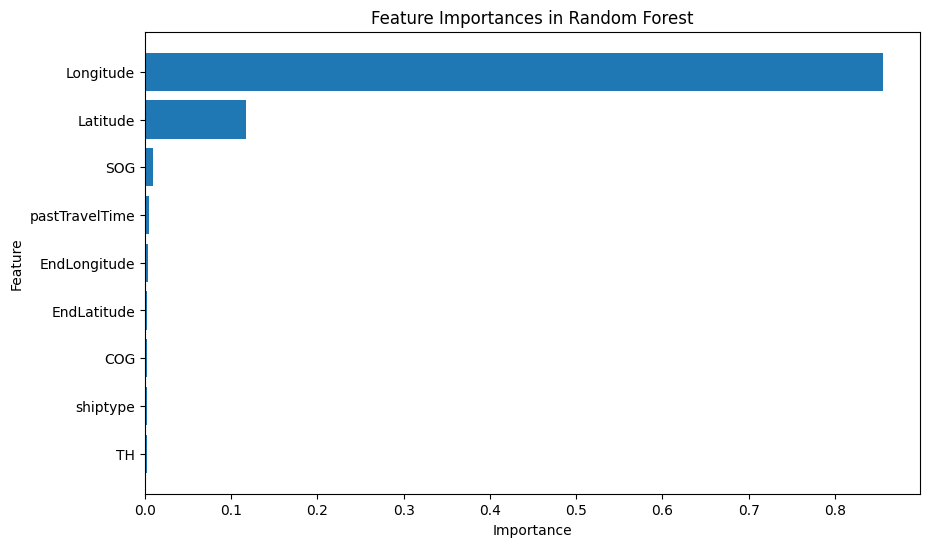

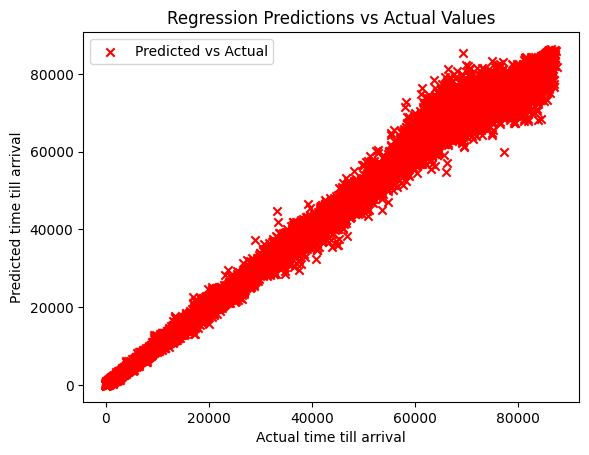

In [5]:
# Linear regression as benchmark
reg = LinearRegression().fit(X, y)
y_pred_reg = reg.predict(X_test)
mse_reg = mean_absolute_error(y_test, y_pred_reg)
print("Mean absolute Error for Linear Regression:", mse_reg/60)

# Create and train model
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error for Random Forests: " , mse/60)

# Evaluating feature importance and visualizing via dataframe
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Visualize the results
plt.scatter(y_test,y_pred, marker='x',color='red', label='Predicted vs Actual')
plt.xlabel('Actual time till arrival')
plt.ylabel('Predicted time till arrival')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()